# 1D Kernel Regression (without L2 penalty)
This is a simplified example for A3
***
We would like to visualize the kernels for 1D Feature Vector
We will just use the RBF kernel as our kernel function:

$ K(X_i,X_j) = \exp \{ -\gamma ||X_i -X_j||^2 \}  $.



In [139]:
# You may only use the following packages in your homework assignment
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

class KernelRidgeRegression(object):
    
    def __init__(self, X, Y, gamma=1):
        """
        X: NxD-dim numpy array, covariate matrix.
        Y: N-dim numpy array, targets.
        gamma: positive float, length scale parameter.
        """
        self.X = X
        self.N, self.D = self.X.shape
        self.Y = Y
        assert(gamma > 0)
        self.gamma = gamma

        
    def rbf_kernel(self, X, X_star=None):
        """
        Radial basis function kernel. This functions should return a pairwise kernel 
        evaluation of all the observations in X. Or, optionally, a pairwise evaluation
        of the observations in X with the observations in X_star.
        
        X: N x D-dim numpy array. If X_star is none, this function will compute a 
           pairwise evaluation K(X_i,X_j) of all the observations (X_i,X_j) in X.
        
        X_star: N_star x D-dim numpy array. If this arguement is used, then this function
                will evaluate all pairwaise kernel evaluations between X and X_star.
        """
        
        # the cdist(A,B) function computes pairwise Euclidean distances between arrays A and B
        # you can use this function to compute the RBF kernel
        if X_star is None:
            K = -self.gamma*cdist(X, X, 'sqeuclidean')
            K = np.exp(K)
        else:
            K = -self.gamma*cdist(X_star, X, 'sqeuclidean')
            K = np.exp(K) 
        return K   

    # def fit(self, folds, grid):
    #     """
    #     This function runs K-fold cross validation over a grid of values to select 
    #     the length scale parameter. 
        
    #     folds: integer, number of folds to evaluate in CV.
    #     grid: array, array of candidate values for length scale.
    #     """
      
    
    def predict(self, X_star):
        """
        This function returns a prediction given test inputs, X_star. 
        """
        K_star = self.rbf_kernel(self.X,X_star)
        K = self.rbf_kernel(self.X)
        Y_star = K_star @ np.linalg.inv(K) @ self.Y
        return Y_star
    
   
    
   

3.) Next, generate some synthetic data from a cosine function on [-1,1] and add some Gaussian noise to the targets. First make predictions using an "underfit" model (with a small gamma value). Then use 5-fold cross validation to select a length scale value and make predictions using the same test data. Plot the training data and the test predictions for both cases. Then, compare the MSE values between the two cases.

In [140]:
X = np.linspace(-1,1,100)[:,None]
Y =  np.cos(10.*X) + np.random.normal(scale=.5,size=(100,1))
X_star = np.linspace(-1,1,50)[:,None]
Y_star = np.cos(10.*X_star) + np.random.normal(scale=.5,size=(50,1))



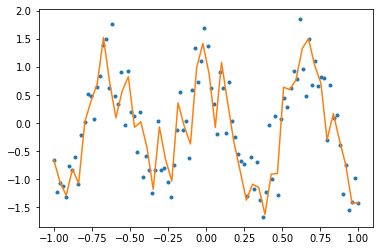

MSE: 0.58


In [141]:

krr = KernelRidgeRegression(X=X,Y=Y, gamma=400)
Y_pred = krr.predict(X_star=X_star)
plt.plot(X.flatten(),Y.flatten(),'.')
plt.plot(X_star.flatten(),Y_pred.flatten())
plt.show()
MSE = np.mean((Y_pred.flatten() - Y_star.flatten())**2)
print("MSE: %.2f" % MSE)




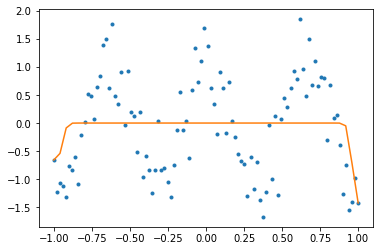

MSE: 0.88


In [142]:

krr = KernelRidgeRegression(X=X,Y=Y, gamma=4000000)
Y_pred = krr.predict(X_star=X_star)
plt.plot(X.flatten(),Y.flatten(),'.')
plt.plot(X_star.flatten(),Y_pred.flatten())
plt.show()
MSE = np.mean((Y_pred.flatten() - Y_star.flatten())**2)
print("MSE: %.2f" % MSE)


In [143]:
def visualize_kernels(krr, no_samples=10):
    plt.figure(figsize = (10,5))
    x_grid = np.linspace(-1, 1, 1000).reshape((-1,1))
    for xi in krr.X[1::krr.X.shape[0]//no_samples]: 
        k = krr.rbf_kernel(x_grid, xi.reshape((-1,1)))
        plt.plot(x_grid, k.flatten(), label='Kernel at xi=' + str(xi))
        
    plt.ylabel('Kernel Weights wi')
    plt.xlabel('x')
    plt.legend()

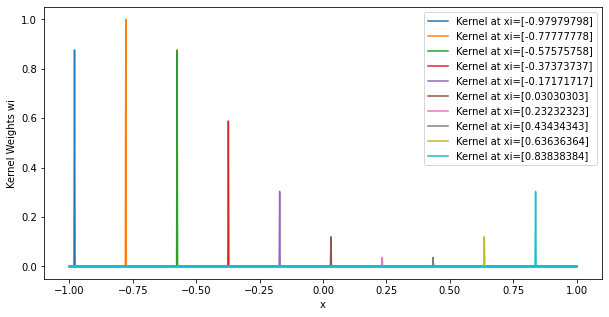

In [144]:
krr = KernelRidgeRegression(X=X,Y=Y, gamma=4000000)
visualize_kernels(krr, 10)

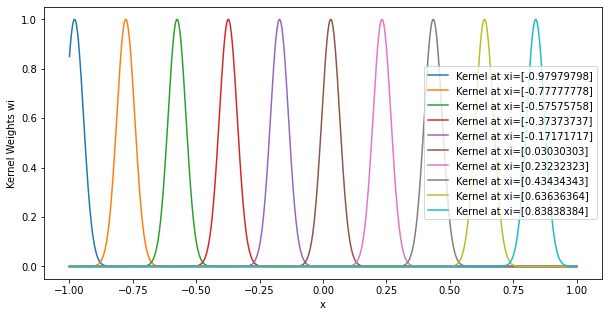

In [145]:
krr = KernelRidgeRegression(X=X,Y=Y, gamma=400)
visualize_kernels(krr, 10)